### 1. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("https://github.com/daffa1134/Praktikum-VisDat/blob/main/dataPilpres.xlsx?raw=true", sheet_name='Sheet1')
print("Data berhasil dibaca!")

Data berhasil dibaca!


Melihat 5 data teratas

In [3]:
df.head()

,NAMA_PROV,NAMA_KAB/KOTA,NOMOR 01,NOMOR 02
0,ACEH,ACEH SELATAN,3267680,31334160
1,ACEH,ACEH TENGGARA,13105015,35300265
2,ACEH,ACEH TIMUR,10984869,91387359
3,ACEH,ACEH TENGAH,14001880,21683385
4,ACEH,ACEH BARAT,5079183,31261548


Melihat 5 data terbawah

In [4]:
df.tail()

,NAMA_PROV,NAMA_KAB/KOTA,NOMOR 01,NOMOR 02
509,PAPUA BARAT,MANOKWARI SELATAN,1340868,130815
510,PAPUA BARAT,PEGUNUNGAN ARFAK,5333746,64574
511,SULAWESI TENGGARA,MUNA BARAT,1587818,2293792
512,SULAWESI TENGGARA,BUTON TENGAH,1730421,2092398
513,SULAWESI TENGGARA,BUTON SELATAN,1622950,1414910


Menghitung missing values pada dataset

In [5]:
df.isnull().sum()

NAMA_PROV        0
NAMA_KAB/KOTA    0
NOMOR 01         0
NOMOR 02         0
dtype: int64

Melihat banyaknya entri pada dataset

In [6]:
print(df.shape)

(514, 4)


Melihat info pada dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NAMA_PROV      514 non-null    object
 1   NAMA_KAB/KOTA  514 non-null    object
 2   NOMOR 01       514 non-null    int64 
 3   NOMOR 02       514 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.2+ KB


Melihat ringkasan terkait dataset

In [8]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Columns: 4 entries, NAMA_PROV to NOMOR 02
dtypes: int64(2), object(2)
memory usage: 16.2+ KB


Mendapatkan list kolom pada dataset

In [9]:
df.columns

Index(['NAMA_PROV', 'NAMA_KAB/KOTA', 'NOMOR 01', 'NOMOR 02'], dtype='object')

Mendapatkan list index dari dataset

In [10]:
df.index

RangeIndex(start=0, stop=514, step=1)

Tipe default dari setiap index dan kolom **bukanlah** list

In [11]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


Untuk mendapatkan index dan kolom sebagai list, kita bisa menggunakan method `toList()`

In [12]:
df.columns.tolist()

['NAMA_PROV', 'NAMA_KAB/KOTA', 'NOMOR 01', 'NOMOR 02']

In [13]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
print(type(df.columns.tolist()))
print(type(df.index.tolist()))

<class 'list'>
<class 'list'>


### 2. FILTERING

#### 1. Mengganti nama beberapa kolom.

In [15]:
df.rename(columns={'NAMA_PROV':'Provinsi','NAMA_KAB/KOTA':'Kabupaten', 'NOMOR 01':'Nomor 1', 'NOMOR 02':'Nomor 2'}, inplace = True)
df.head()

,Provinsi,Kabupaten,Nomor 1,Nomor 2
0,ACEH,ACEH SELATAN,3267680,31334160
1,ACEH,ACEH TENGGARA,13105015,35300265
2,ACEH,ACEH TIMUR,10984869,91387359
3,ACEH,ACEH TENGAH,14001880,21683385
4,ACEH,ACEH BARAT,5079183,31261548


#### 2. Memastikan semua kolom bertipe string.

In [16]:
all(isinstance(column, str) for column in df.columns)

True

#### 3. Menjadikan kabupaten sebagai index

In [17]:
df.set_index('Kabupaten', inplace = True)

In [18]:
# optional: to remove the name of the index
df.index.name = None

In [19]:
df.head()

,Provinsi,Nomor 1,Nomor 2
ACEH SELATAN,ACEH,3267680,31334160
ACEH TENGGARA,ACEH,13105015,35300265
ACEH TIMUR,ACEH,10984869,91387359
ACEH TENGAH,ACEH,14001880,21683385
ACEH BARAT,ACEH,5079183,31261548


#### 4. Menambah kolom total.

In [20]:
df['Total'] = df.sum(axis=1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Provinsi,Nomor 1,Nomor 2,Total
ACEH SELATAN,ACEH,3267680,31334160,34601840
ACEH TENGGARA,ACEH,13105015,35300265,48405280
ACEH TIMUR,ACEH,10984869,91387359,102372228
ACEH TENGAH,ACEH,14001880,21683385,35685265
ACEH BARAT,ACEH,5079183,31261548,36340731


Sekarang dataset memiliki kolom baru, yaitu kolom total yang menjumlahkan orang yang memilih Nomor 1 dan Nomor 2. Jadi jika kita print dimensi data, kita akan mendapatkan:

In [21]:
print('data dimensions:', df.shape)

data dimensions: (514, 4)


### 3. Pie Chart

Melakukan pengelompokkan data berdasarkan provinsi

In [22]:
# Mengelompokkan Kabupaten berdasarkan provinsi dan menerapkan fungsi sum() 
df_Prov = df.groupby('Provinsi', axis = 0).sum()

# Output dari method groupby adalah `groupby' object
print(type(df.groupby('Provinsi', axis=0)))

df_Prov = df_Prov.head(6)

df_Prov.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Nomor 1,Nomor 2,Total
Provinsi,,,
ACEH,131990815,998216464,1130207279
BALI,200205087,17846457,218051544
BANTEN,533783770,931660840,1465444610
BENGKULU,90277205,85963033,176240238
DAERAH ISTIMEWA YOGYAKARTA,152704109,64778657,217482766


Plotting data yang didapatkan menjadi pie chart dengan menggunakan parameter `kind = 'pie'`

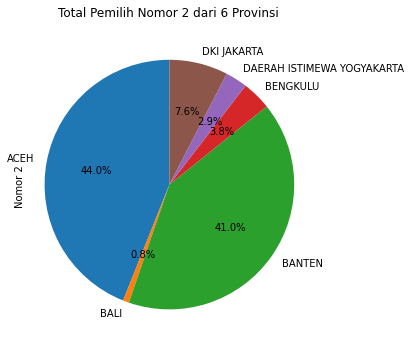

In [23]:
df_Prov['Nomor 2'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            )

plt.title('Total Pemilih Nomor 2 dari 6 Provinsi')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Melakukan sedikit modifikasi terhadap pie chart di atas

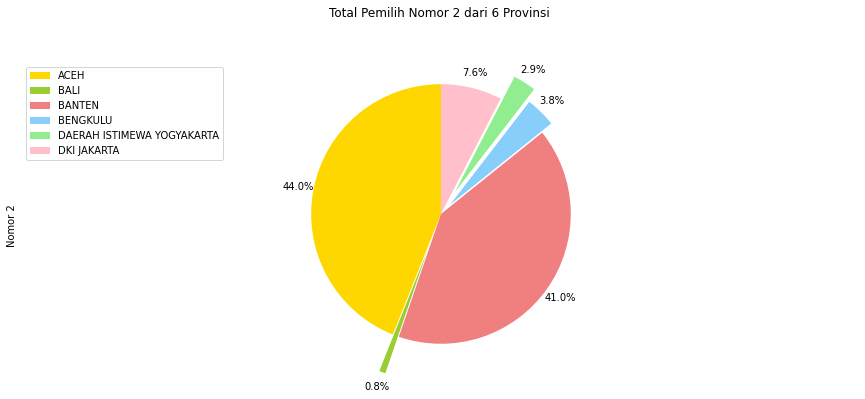

In [24]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0.3, 0, 0.1, 0.2, 0]

df_Prov['Nomor 2'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 province
                            )

# scale the title up by 12% to match pctdistance
plt.title('Total Pemilih Nomor 2 dari 6 Provinsi', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_Prov.index, loc='upper left') 

plt.show()

### 4. Box Plot

`box plot` adalah cara statistik untuk merepresentasikan *distribusi* data melalui 5 fungsi utama:
*   **Minimum** 
*   **First quartile**
*   **Second quartile (Median)**
*   **Third quartile**
*   **Maximum**

Mendapatkan subset dari dataset

In [25]:
pilihan = ['Nomor 1', 'Nomor 2']

df_Pidie = df.loc[['PIDIE'], pilihan].transpose()

df_Pidie.head()

,PIDIE
Nomor 1,12959690
Nomor 2,153618280


Melakukan plotting

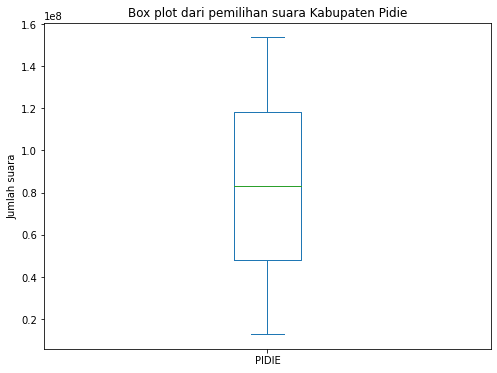

In [26]:
df_Pidie.plot(kind='box', figsize=(8, 6))

plt.title('Box plot dari pemilihan suara Kabupaten Pidie')
plt.ylabel('Jumlah suara')

plt.show()

Kita juga dapat melihat ringkasan dari box plot dengan menggunakan method `describe()` pada dataframe

In [27]:
df_Pidie.describe()

,PIDIE
count,2.000000e+00
mean,8.328898e+07
std,9.946064e+07
min,1.295969e+07
25%,4.812434e+07
50%,8.328898e+07
75%,1.184536e+08
max,1.536183e+08


### 5. Scatter Plot

Mengambil dataset untuk mendapatkan relasi antara kabupaten dengan total

In [116]:
# Mendapatkan data set
df_Prov = df.groupby('Provinsi', axis = 0).sum()

df_Prov = df_Prov.sort_values(['Total'], ascending = True, axis = 0)

In [117]:
# Mendapatkan data set
df_Scatter = df_Prov.head(12)

df_Scatter = df_Scatter.reset_index()

df_Scatter.head()

,Provinsi,Nomor 1,Nomor 2,Total
0,KALIMANTAN UTARA,28600743,8945273,37546016
1,KEPULAUAN BANGKA BELITUNG,28638383,17274645,45913028
2,KEPULAUAN RIAU,32961223,27750391,60711614
3,PAPUA BARAT,72685637,17122019,89807656
4,SULAWESI BARAT,58366678,32182272,90548950


Plotting data. Kita dapat membuat scatter plot dengan menerapkan `kind='scatter'` sebagai argumen. Kita juga perlu menspesifikasikan `x` dan `y` yang diambil dari kolom.

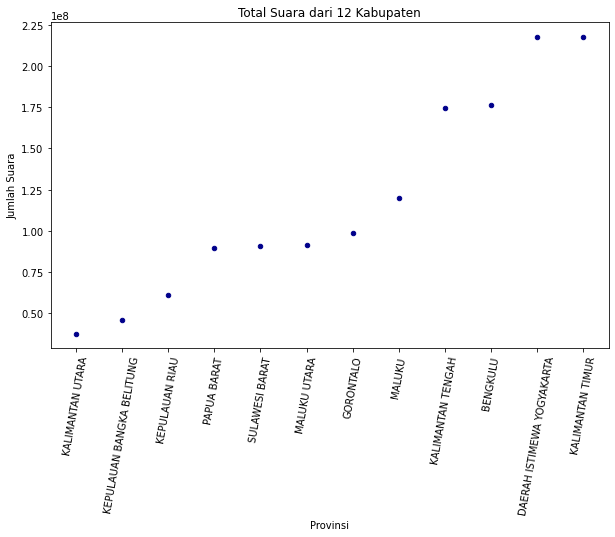

In [118]:
df_Scatter.plot(kind='scatter', x='Provinsi', y='Total', figsize=(10, 6),color='darkblue', rot = 80)

plt.title('Total Suara dari 12 Kabupaten')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Suara')

plt.show()